In [22]:
from IPython.display import Image

In [9]:
# standard libraries 
import numpy as np
import pandas as pd

In [10]:
df_train  = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label_coordinates.csv')
df_train_desc  = pd.read_csv('train_series_descriptions.csv')
df_test_desc   = pd.read_csv('test_series_descriptions.csv')
df_sub         = pd.read_csv('sample_submission.csv')

In [11]:
df_train.head(3)

study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3  \
0   4003253                 Normal/Mild                 Normal/Mild   
1   4646740                 Normal/Mild                 Normal/Mild   
2   7143189                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5  \
0                 Normal/Mild                 Normal/Mild   
1                    Moderate                      Severe   
2                 Normal/Mild                 Normal/Mild   

  spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2  \
0                 Normal/Mild                           Normal/Mild   
1                 Normal/Mild                           Normal/Mild   
2                 Normal/Mild                           Normal/Mild   

  left_neural_foraminal_narrowing_l2_l3 left_neural_foraminal_narrowing_l3_l4  \
0                           Normal/Mild                           Normal/Mild   
1                           Normal/Mild                           Normal/Mild   
2                           Normal/Mild                           Normal/Mild   

  left_neural_foraminal_narrowing_l4_l5  ... left_subarticular_stenosis_l1_l2  \
0                              Moderate  ...                      Normal/Mild   
1                              Moderate  ...                      Normal/Mild   
2                           Normal/Mild  ...                      Normal/Mild   

  left_subarticular_stenosis_l2_l3 left_subarticular_stenosis_l3_l4  \
0                      Normal/Mild                      Normal/Mild   
1                      Normal/Mild                      Normal/Mild   
2                      Normal/Mild                      Normal/Mild   

  left_subarticular_stenosis_l4_l5 left_subarticular_stenosis_l5_s1  \
0                         Moderate                      Normal/Mild   
1                           Severe                      Normal/Mild   
2                      Normal/Mild                      Normal/Mild   

  right_subarticular_stenosis_l1_l2 right_subarticular_stenosis_l2_l3  \
0                       Normal/Mild                       Normal/Mild   
1                       Normal/Mild                          Moderate   
2                       Normal/Mild                       Normal/Mild   

  right_subarticular_stenosis_l3_l4 right_subarticular_stenosis_l4_l5  \
0                       Normal/Mild                       Normal/Mild   
1                          Moderate                          Moderate   
2                       Normal/Mild                       Normal/Mild   

  right_subarticular_stenosis_l5_s1  
0                       Normal/Mild  
1                       Normal/Mild  
2                       Normal/Mild  

[3 rows x 26 columns]

In [12]:
df_train_label.head(3)

study_id  series_id  instance_number              condition  level  \
0   4003253  702807833                8  Spinal Canal Stenosis  L1/L2   
1   4003253  702807833                8  Spinal Canal Stenosis  L2/L3   
2   4003253  702807833                8  Spinal Canal Stenosis  L3/L4   

            x           y  
0  322.831858  227.964602  
1  320.571429  295.714286  
2  323.030303  371.818182

In [13]:
df_train_desc.head(3)

study_id   series_id series_description
0   4003253   702807833   Sagittal T2/STIR
1   4003253  1054713880        Sagittal T1
2   4003253  2448190387           Axial T2

In [14]:
df_test_desc.head(3)

study_id   series_id series_description
0  44036939  2828203845        Sagittal T1
1  44036939  3481971518           Axial T2
2  44036939  3844393089   Sagittal T2/STIR

In [15]:
df_sub.head(3)

row_id  normal_mild  moderate  \
0  44036939_left_neural_foraminal_narrowing_l1_l2     0.333333  0.333333   
1  44036939_left_neural_foraminal_narrowing_l2_l3     0.333333  0.333333   
2  44036939_left_neural_foraminal_narrowing_l3_l4     0.333333  0.333333   

     severe  
0  0.333333  
1  0.333333  
2  0.333333

In [55]:
#[train/test]_images/[study_id]/[series_id]/[instance_number].dcm

print("\t\t\t[train_images/test_images]/[4003253]/[702807833]/[8]\n")
#Image("train_test.png", width=800)

			[train_images/test_images]/[4003253]/[702807833]/[8]



In [51]:
print("\t\t\tRepresentation of Metadata and MRI image using DICOM viewer application\n")
#Image("dicom.png", width=900)

			Representation of Metadata and MRI image using DICOM viewer application



In [27]:
import pydicom
dicom_file_path = 'train_images/4003253/702807833/7.dcm'
dicom_data = pydicom.dcmread(dicom_file_path)
print(dicom_data)

Dataset.file_meta -------------------------------
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 4003253.1.7
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008,0018) SOP Instance UID                    UI: 4003253.1.7
(0008,0023) Content Date                        DA: '20240503'
(0008,0033) Content Time                        TM: '223714.614509'
(0008,103E) Series Description                  LO: 'T2'
(0010,0020) Patient ID                          LO: '4003253'
(0018,0050) Slice Thickness                     DS: '4.0'
(0018,0088) Spacing Between Slices              DS: '4.8'
(0018,5100) Patient Position                    CS: 'HFS'
(00

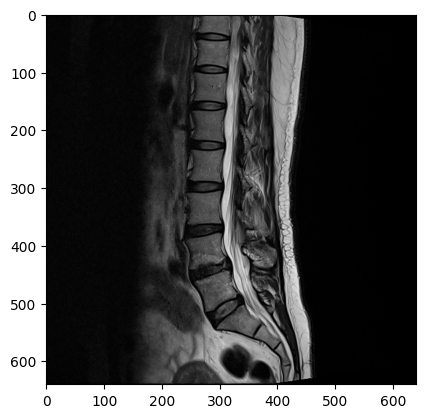

In [28]:
import matplotlib.pyplot as plt
pixel_array = dicom_data.pixel_array
# Image ko display karna
plt.imshow(pixel_array, cmap='gray')
plt.show()

In [29]:
import os
# List out all of the Studies we have on patients.
part_1 = os.listdir('train_images')
part_1 = list(filter(lambda x: x.find('.DS') == -1, part_1))

In [30]:
df_meta_f = pd.read_csv('train_series_descriptions.csv')

In [31]:
p1 = [(x, f"train_images/{x}") for x in part_1]
meta_obj = { p[0]: { 'folder_path': p[1], 
                    'SeriesInstanceUIDs': [] 
                   } 
            for p in p1 }

In [32]:
for m in meta_obj:
    meta_obj[m]['SeriesInstanceUIDs'] = list(
        filter(lambda x: x.find('.DS') == -1, 
               os.listdir(meta_obj[m]['folder_path'])
              )
    )

In [33]:
from tqdm import tqdm
# grabs the correspoding series descriptions
for k in tqdm(meta_obj):
    for s in meta_obj[k]['SeriesInstanceUIDs']:
        if 'SeriesDescriptions' not in meta_obj[k]:
            meta_obj[k]['SeriesDescriptions'] = []
        try:
            meta_obj[k]['SeriesDescriptions'].append(
                df_meta_f[(df_meta_f['study_id'] == int(k)) & 
                (df_meta_f['series_id'] == int(s))]['series_description'].iloc[0])
        except:
            print("Failed on", s, k)

100%|██████████| 1975/1975 [00:02<00:00, 706.28it/s]


In [34]:
meta_obj[list(meta_obj.keys())[1]]

{'folder_path': 'train_images/1002894806',
 'SeriesInstanceUIDs': ['1252873726', '801316590', '866293114'],
 'SeriesDescriptions': ['Axial T2', 'Sagittal T2/STIR', 'Sagittal T1']}

In [47]:
import glob

patient = df_train.iloc[1]
ptobj = meta_obj[str(patient['study_id'])]

im_list_dcm = {}
for idx, i in enumerate(ptobj['SeriesInstanceUIDs']):
    im_list_dcm[i] = {'images': [], 'description': ptobj['SeriesDescriptions'][idx]}
    images = glob.glob(f"{ptobj['folder_path']}/{ptobj['SeriesInstanceUIDs'][idx]}/*.dcm")
    for j in sorted(images, key=lambda x: int(x.split('/')[-1].replace('.dcm', '').split('\\')[-1])):
        im_list_dcm[i]['images'].append({
        'SOPInstanceUID': j.split('/')[-1].replace('.dcm', '').split('\\')[-1],
        'dicom': pydicom.dcmread(j)
    })


In [48]:
# Function to display images
def display_images(images, title, max_images_per_row=4):
    # Calculate the number of rows needed
    num_images = len(images)
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Ceiling division

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, max_images_per_row, figsize=(5, 1.5 * num_rows))
    
    # Flatten axes array for easier looping if there are multiple rows
    if num_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Make it iterable for consistency

    # Plot each image
    for idx, image in enumerate(images):
        ax = axes[idx]
        ax.imshow(image, cmap='gray')  # Assuming grayscale for simplicity, change cmap as needed
        ax.axis('off')  # Hide axes

    # Turn off unused subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')
    fig.suptitle(title, fontsize=16)

    plt.tight_layout()

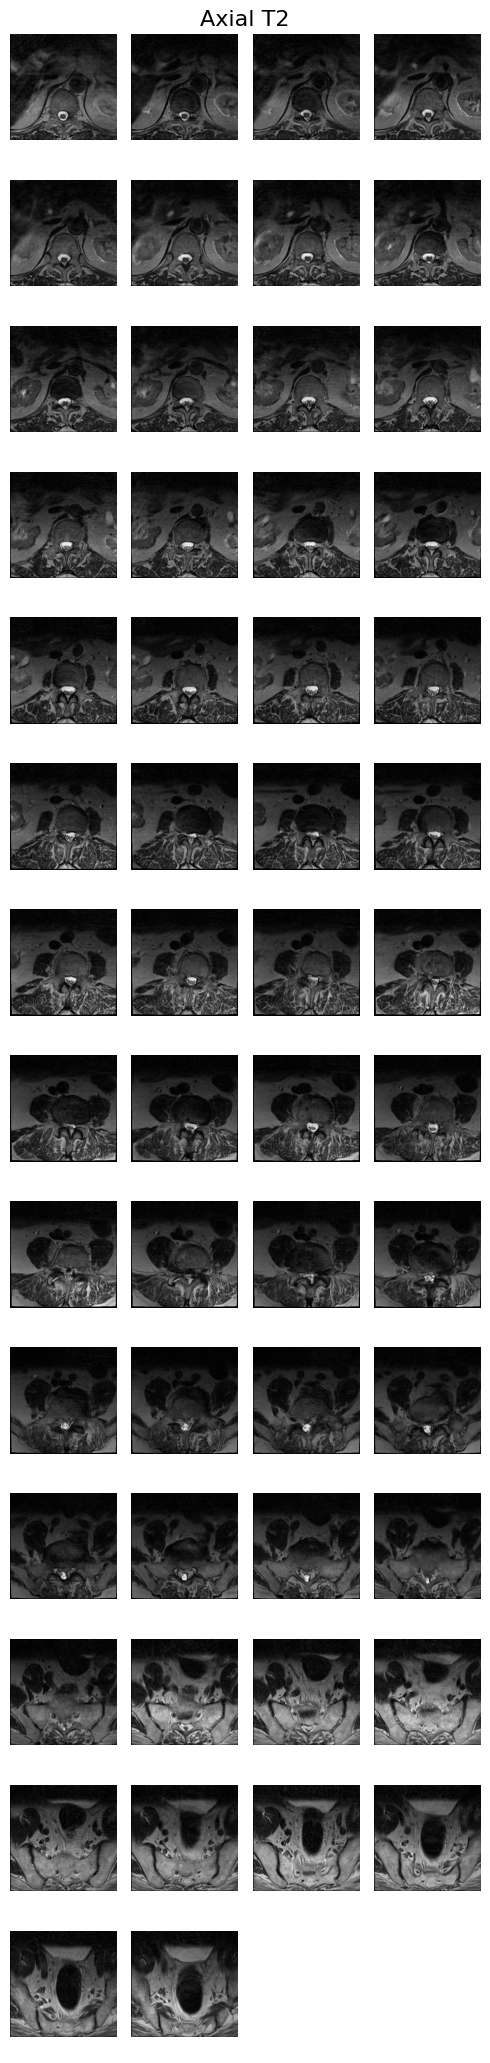

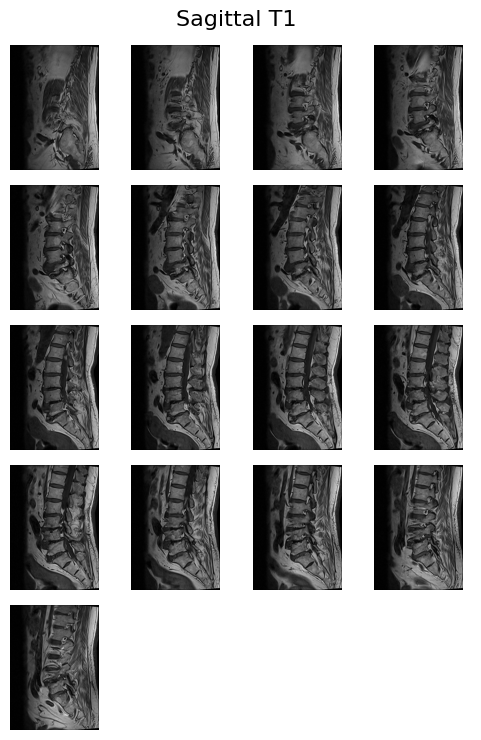

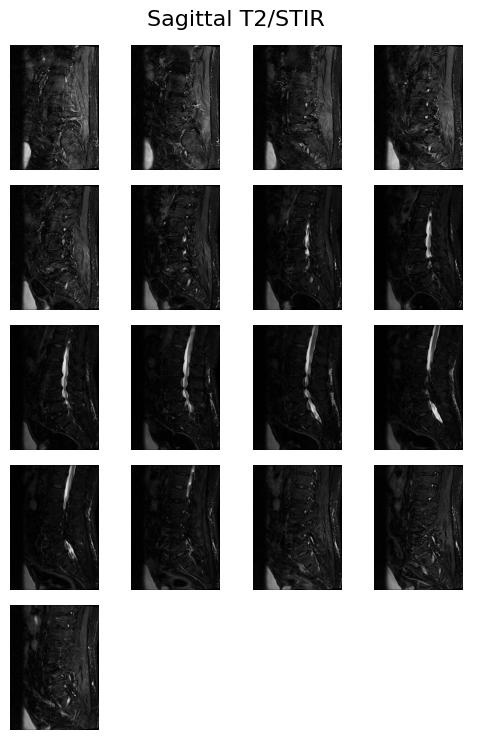

In [49]:
for i in im_list_dcm:
    display_images([x['dicom'].pixel_array for x in im_list_dcm[i]['images']], 
                   im_list_dcm[i]['description'])

In [39]:
import pydicom as dicom
from matplotlib.colors import Normalize
import matplotlib.patches as patches

train_label_coordinates=df_train_label
train_label_coordinates['series_description'] = df_train_desc.series_description

In [44]:
def mrt(id, ser, inst):
    lag=20
    path2 = 'train_images/' + str(id) +'/' + str(ser)+'/' + str(inst) + '.dcm'

    ds = dicom.dcmread(path2)
    fig, ax = plt.subplots(figsize=(16, 8))
    from matplotlib.colors import LogNorm 

    # Use Normalize for linear scaling
    norm = Normalize(vmin=ds.pixel_array.min(), vmax=ds.pixel_array.max())
    ax.imshow(ds.pixel_array, cmap='gray', norm=norm)  # Display the image with 'gray' colormap

    # Create a legend
    legend_elements = []

    # Plot the coordinates for the current condition
    ab = train_label_coordinates[(train_label_coordinates.study_id==id) & 
                                          (train_label_coordinates.instance_number==inst)&
                                         (train_label_coordinates.series_id==ser)]

    a = 25 * max(ds.pixel_array.shape)/640
    for _, row in ab.iterrows():
        x, y = row['x'], row['y']

        rect2 = patches.Rectangle((x - a, y - a), 2*a, 2*a, linewidth=2, edgecolor='white', facecolor='none')
        rect1 = patches.Rectangle((x - a, y - a), 2*a, 2*a, linewidth=2, facecolor='white', alpha = 0.25)

        ax.add_patch(rect2)
        ax.add_patch(rect1)

        # Add the condition to the legend
        legend_elements.append(patches.Patch(facecolor='none', edgecolor='r', ))

    # Add title
    title = f"{ab.series_description.unique()}, Study: {id}, Series: {ser}, Instance: {inst}"
    ax.set_title(title, fontsize=20)

    # Display additional columns:
    for _, row in ab.iterrows():
        text = f"level {row['level']}, {row['condition']}"
        ax.text(row['x'] + lag, row['y']+np.random.randint(-15, 15), text, fontsize=10, color='white', verticalalignment='center_baseline')
    
    plt.show() 

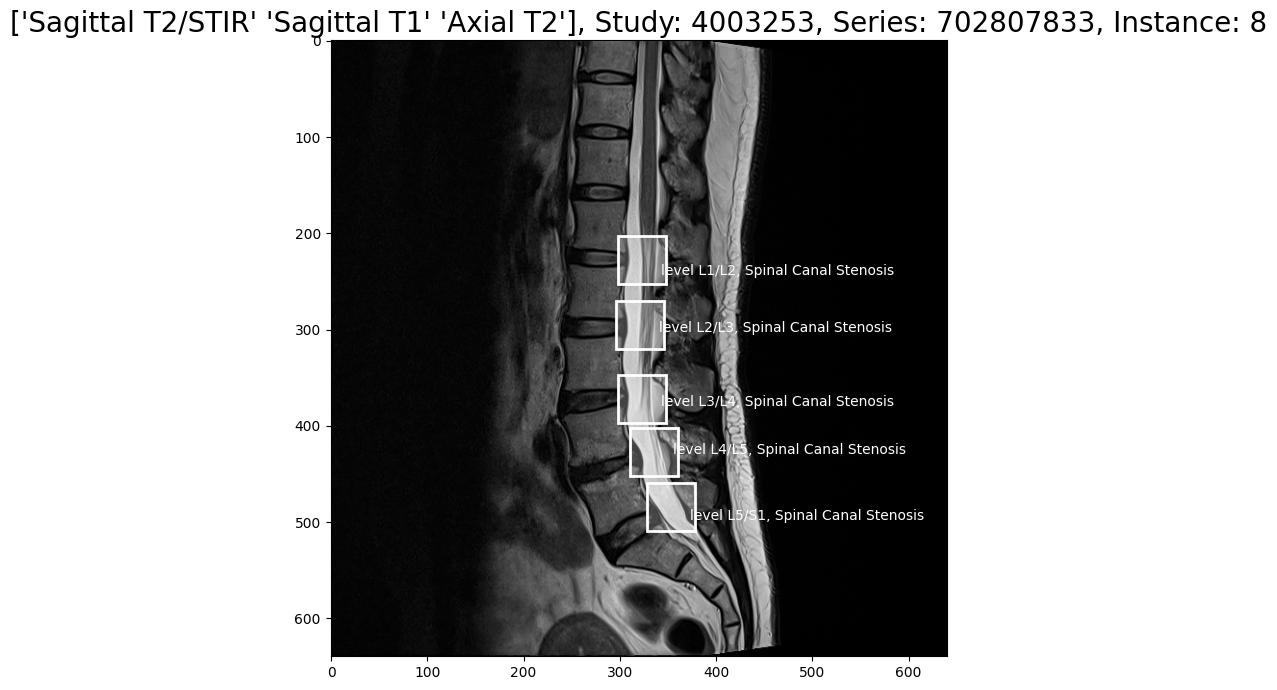

In [45]:
#Case #1
id = 4003253
ser= 702807833
inst=8

mrt(id, ser, inst)

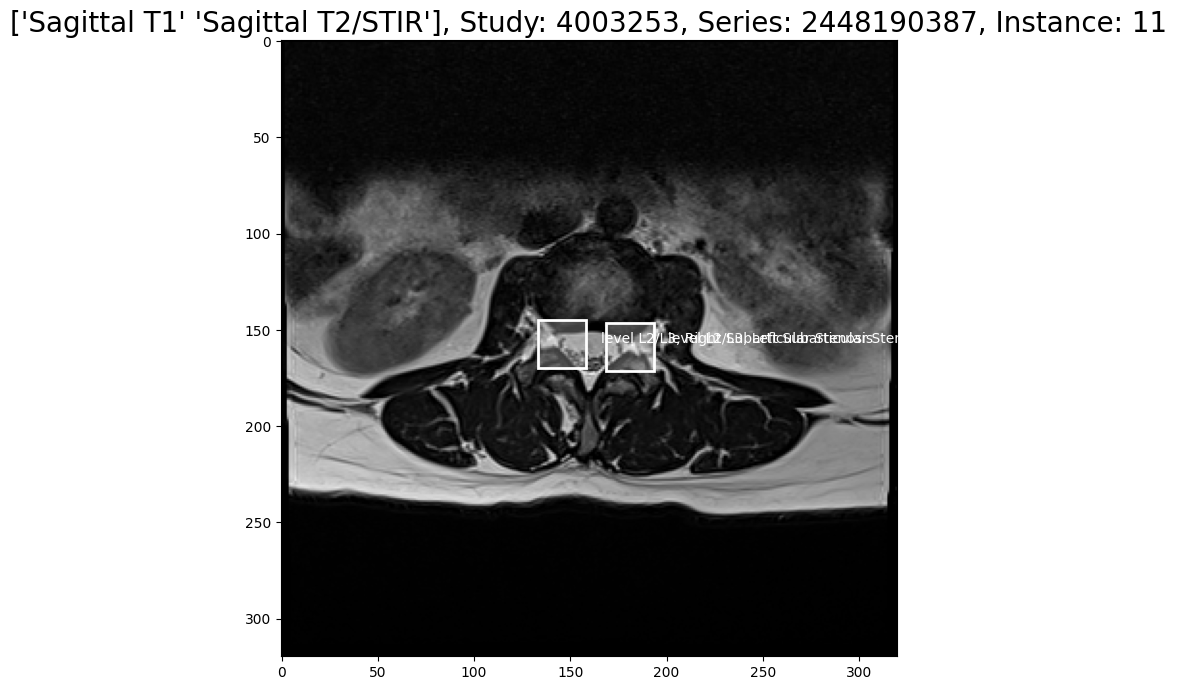

In [46]:
#Case #2
id = 4003253
ser= 2448190387
inst=11

mrt(id, ser, inst)

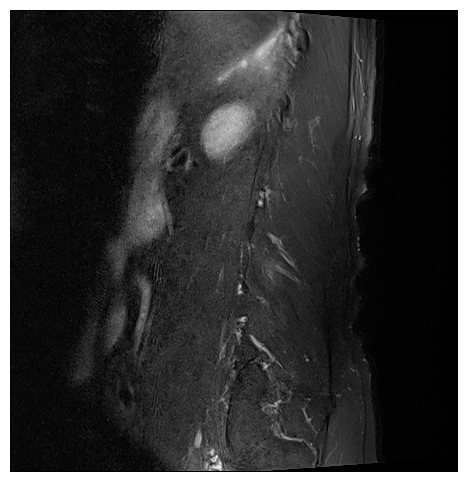

In [43]:
import glob
from matplotlib import animation, rc

rc('animation', html='jshtml')

def load_dicom(filename):
    ds = pydicom.dcmread(filename)
    return ds.pixel_array

def load_dicom_line(path):
    t_paths = sorted(
        glob.glob(os.path.join(path, "*")), 
        key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split("-")[-1]),
    )
    images = []
    for filename in t_paths:
        data = load_dicom(filename)
        if data.max() == 0:
            continue
        images.append(data)
    return images

def create_animation(ims):
    fig = plt.figure(figsize=(6, 6))
    plt.axis('off')
    im = plt.imshow(ims[0], cmap="gray")

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000//24)

path_to_folder = "train_images/100206310/1792451510"
images = load_dicom_line(path_to_folder)
anim = create_animation(images)
anim